# 許容誤差の検証

## (1) 方位の回転に対する許容誤差
### 設定パラメータ
- 焦点距離: 25mm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import gistool
from math import pi, cos, sin
%matplotlib notebook

# height = np.arange(0,210,10)
height = np.linspace(0, 200, 21)

ccd_size_v = 13		# vertical ccd image size [mm]
ccd_size_h = 17.3	# horizontal ccd image size [mm]

f_length = 25 # focal length [mm]

img_size_v = ccd_size_v/float(f_length)*height
img_size_h = ccd_size_h/float(f_length)*height


<IPython.core.display.Javascript object>


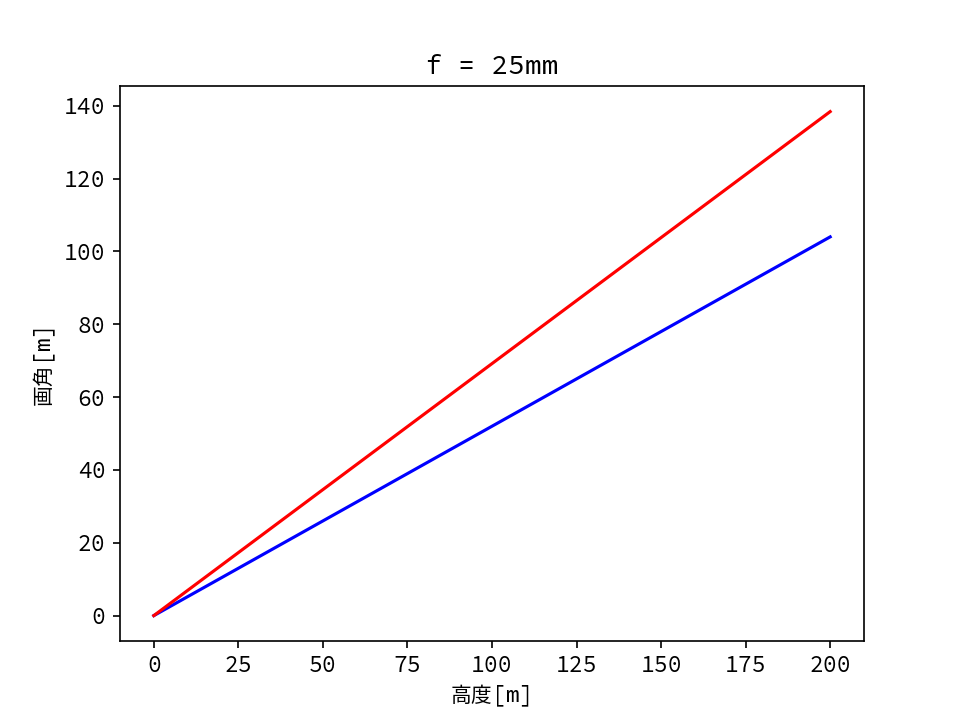

In [2]:

fig = plt.figure()
ax = fig.add_subplot(111) 
plt.plot(height, img_size_v, 'b-')
plt.plot(height, img_size_h, 'r-')
plt.xlabel('高度[m]')
plt.ylabel('画角[m]')
plt.title('f = {}mm'.format(f_length))
plt.show()

<IPython.core.display.Javascript object>


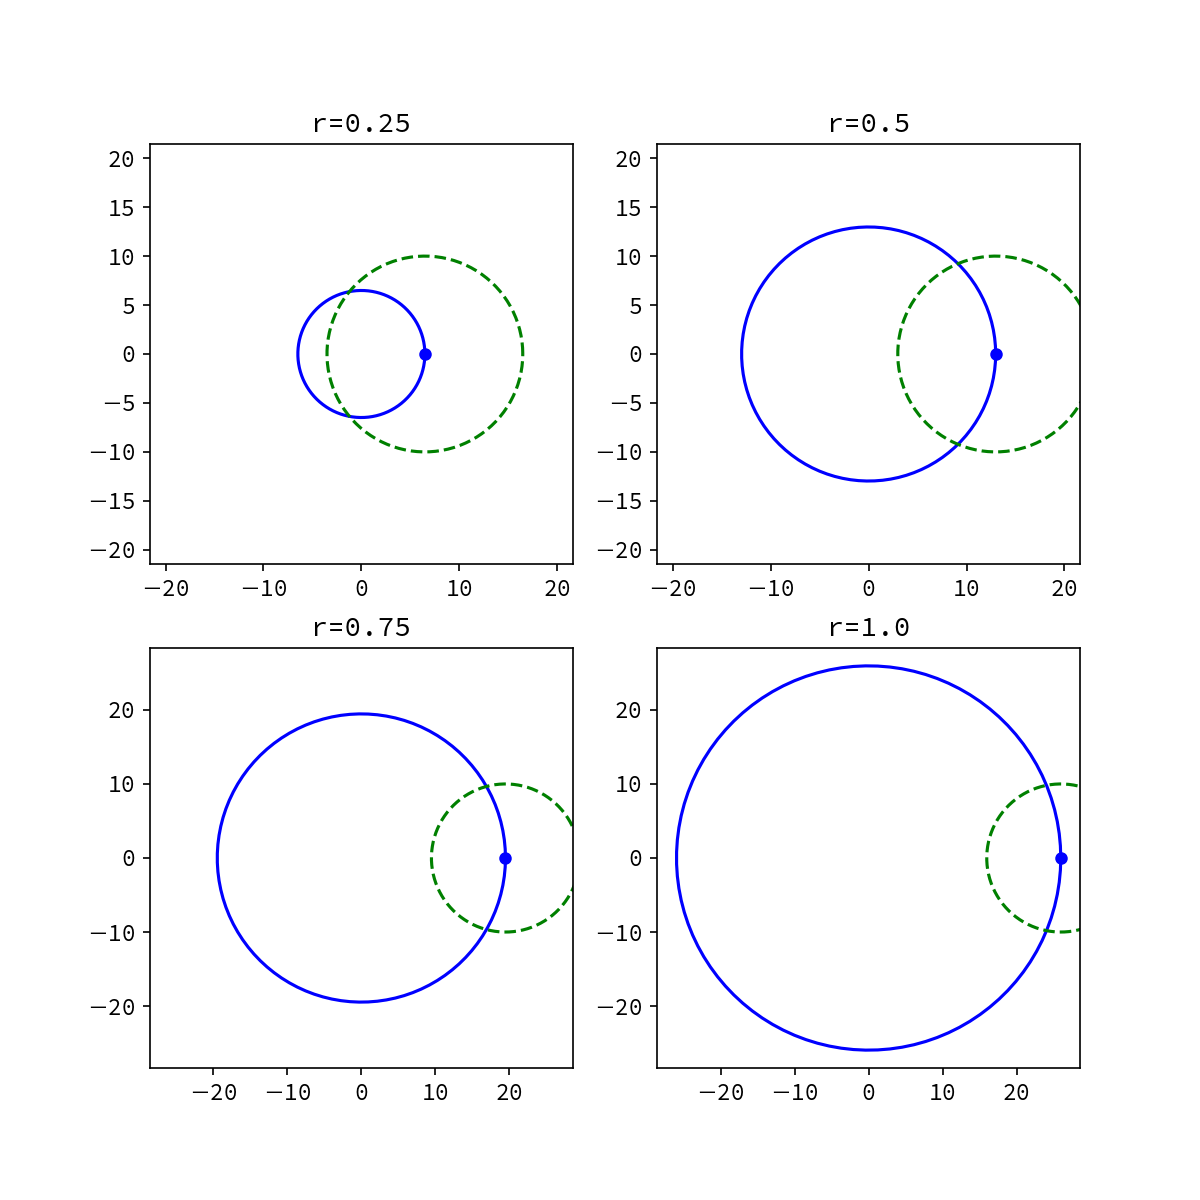

In [3]:
import matplotlib.patches as mpatches

height = 75
img_size_v = ccd_size_v/float(f_length)*height
img_size_h = ccd_size_h/float(f_length)*height

theta = np.linspace(0, 2*np.pi, 100)
rate = np.linspace(0.25, 1.0, 4)
fig = plt.figure(figsize=(8,8))
for i, r in enumerate(rate):
    (x0, y0) = (r * img_size_h / 2.0, 0)
    x = x0 * np.cos(theta)
    y = x0 * np.sin(theta)

    tol_length = 10 # 許容誤差距離
    x_tol = tol_length * np.cos(theta) + x0
    y_tol = tol_length * np.sin(theta) + y0

    plt.subplot(2,2,i+1)
    plt.axis('equal')
    plt.plot(x0, y0 , 'bo', markersize=5)
    plt.plot(x, y,  'b-')
    plt.plot(x_tol, y_tol, 'g--')
    # plt.plot(theta, y, 'r-')
    plt.xlim( -img_size_h/2.0 * 1.1, img_size_h/2.0 * 1.1)
    plt.ylim( -img_size_v/2.0 * 1.1, img_size_v/2.0 * 1.1)
    plt.title('r={}'.format(r))
plt.show()
plt.savefig('tolerance.jpg')

## 考察
画角中心から離れるほど、方位角のずれの許容誤差範囲は狭まる。<br>
画角中心から5mの範囲では、いかなる回転ずれがあっても、許容範囲内に入る。<br>
抽出する座標と画角中心の距離が5mより大きい場合、距離が大きいほど、許容誤差の範囲は狭くなる。


In [5]:
# 計算の実例
def x_crosspoint(r):
    x = r - 100/(2 * r)
    return x

R0 = img_size_h/2.
xtmp = x_crosspoint(R0)
ytmp = R0 * np.sqrt(1 - (xtmp ** 2 / R0 ** 2))
theta0 = np.arctan(ytmp / xtmp) * 180 / pi
print('許容角度ずれ: {:.1f}'.format(theta0))

許容角度ずれ: 22.2


- 高度：75m
- 焦点距離：25mm
- 画角中心からの距離：25.95m （横幅の半分）

**上記の条件で、許容の角度ずれは±22.2°。画角が小さい時には角度ずれはあまり影響しない。**

## (2) 高度の許容誤差
### 設定パラメータ
- 焦点距離: 25mm
- 高度： 70m

次に高度が設定高度とは異なるときに、どの程度、抽出座標がずれるかを見積もる。

In [6]:
start = 0.7
end = 1.3
step = 0.05
num = int((end - start) / step) + 1 
k = np.linspace(start, end, num)
k

array([ 0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,
        1.15,  1.2 ,  1.25,  1.3 ])

In [7]:
height = 70
f_length  = 25
img_size_v = ccd_size_v/float(f_length)*height
img_size_h = ccd_size_h/float(f_length)*height

# 画面半幅のポイントを抽出したと仮定
d0 = img_size_h / 2.

def deff_dis(h):
    dis = (h / height - 1) * d0
    return dis

def dis2height(d):
    h_ans = height / d0 * d
    return h_ans

def height2dis(h):
    d_ans = do / height * h
    return d_ans
    
dis = deff_dis(k * height)
dis

array([-7.266, -6.055, -4.844, -3.633, -2.422, -1.211,  0.   ,  1.211,
        2.422,  3.633,  4.844,  6.055,  7.266])

In [8]:
h_low = dis2height(d0 - 10)
h_up = dis2height(d0 + 10)
h_low, h_up

(41.09826589595376, 98.90173410404623)

In [9]:
print((h_low - height) / height)
print((h_up - height) / height)

-0.41288191577208916
0.41288191577208894


## 考察
上記の設定の下で、高度の許容誤差は±41%（28m）であることがわかった。<br>
**水平方向の誤差10m以内は高度にすると±28mの範囲内となる。<br>
ウェイポイントの対地高度に大きな誤りがなければ、誤差範囲に収まると考えられる。**